In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import spacy


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Haikrishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Haikrishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from wordcloud import WordCloud,STOPWORDS

In [3]:
data=pd.read_csv("spam.csv",encoding="latin-1")
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
data.rename(columns={"v1":"label","v2":"message"},inplace=True)

In [6]:
data['label']=data['label'].map({"ham":0,"spam":1})

In [7]:
data.head(10)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


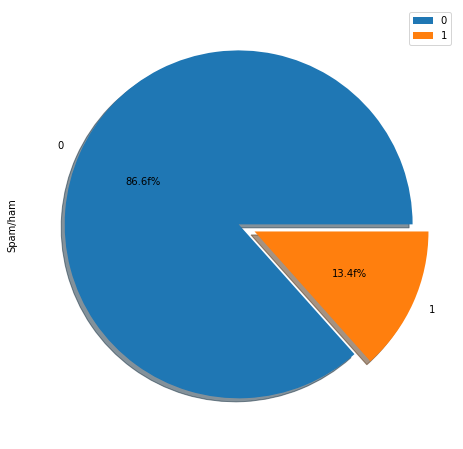

In [8]:
data['label'].value_counts().plot(kind="pie",figsize=(15,8),explode=[0,0.1],autopct = '%1.1ff%%',shadow=True)
plt.ylabel("Spam/ham")
plt.legend()

In [9]:
spam=data["message"][data['label']==1]
ham=data['message'][data['label']==0]
spamword=[]
hamword=[]
def spamwords(spam):
    global spamword
    words=[word.lower() for word in word_tokenize(spam)  if word not in stopwords.words('english') and word.isalpha()]
    spamword=spamword+words
def hamwords(ham):
    global hamword
    words=[word.lower() for word in word_tokenize(ham) if (word not in stopwords.words("english") and word.isalpha())]
    hamword=hamword+words
    
spam.apply(spamwords)
ham.apply(hamwords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: message, Length: 4825, dtype: object

In [10]:
stop=set(STOPWORDS)

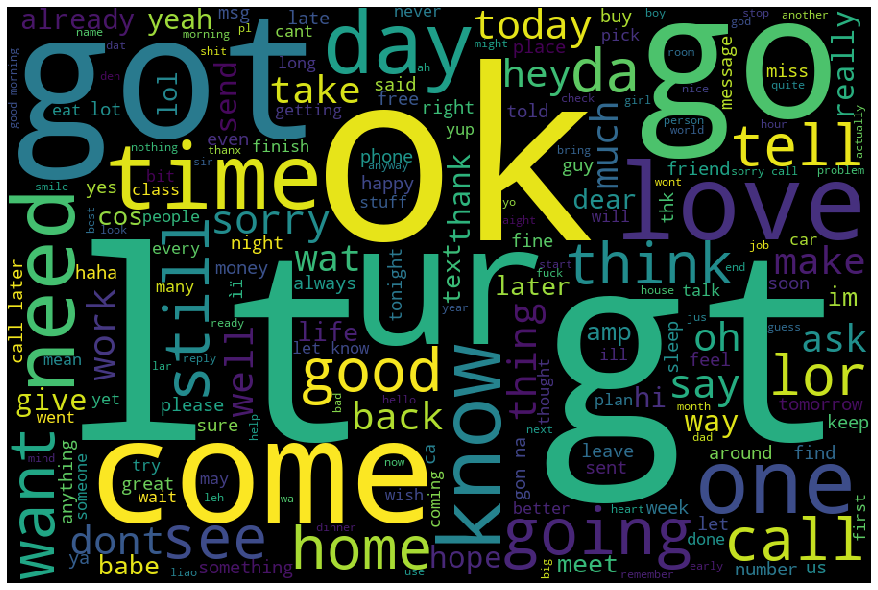

In [11]:
ham_cloud=WordCloud(width=900,height=600,stopwords=stop).generate(' '.join(hamword))
plt.figure(figsize=(12,10))

plt.imshow(ham_cloud)

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

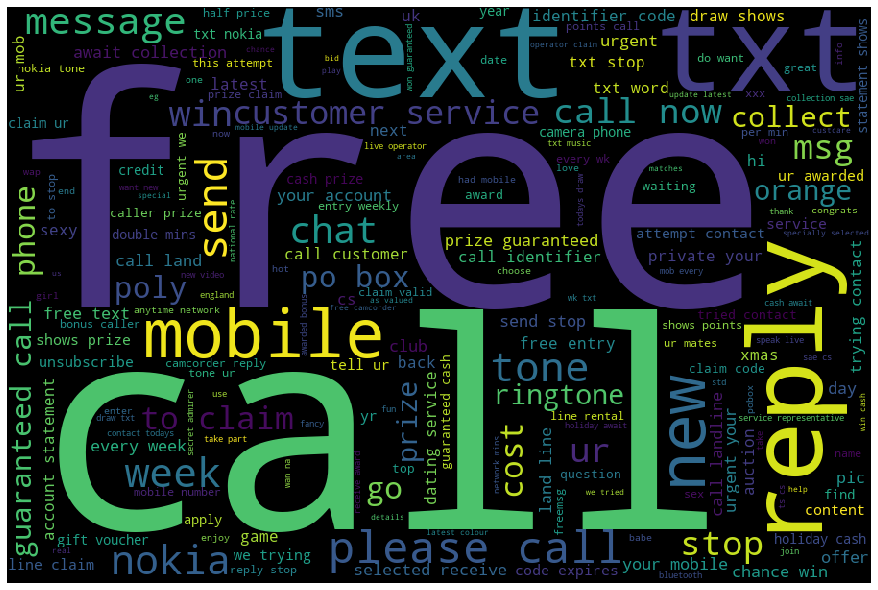

In [12]:
spam_cloud=WordCloud(width=900,height=600,stopwords=stop).generate(' '.join(spamword))
plt.figure(figsize=(12,10))
plt.imshow(spam_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [13]:
spamword=pd.Series(spamword)
spamword.value_counts().head(10)


call      346
free      217
txt       156
u         144
ur        144
mobile    123
text      121
stop      114
claim     113
you       107
dtype: int64

In [14]:
hamword=pd.Series(hamword)
hamword.value_counts().head(10)

i       1910
u        974
gt       318
lt       316
get      301
ok       246
go       246
got      242
ur       237
know     234
dtype: int64

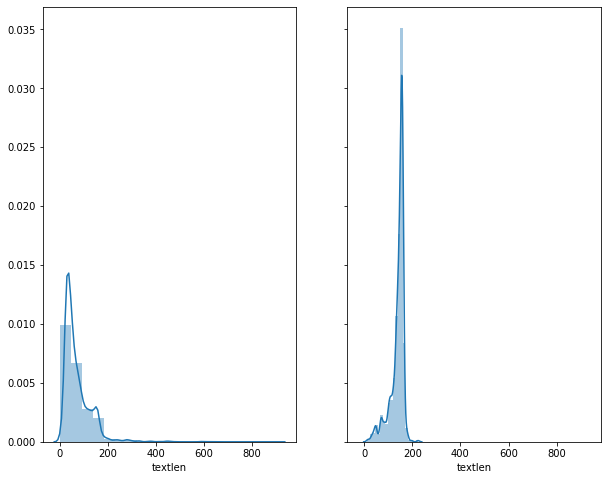

In [15]:
data["textlen"]=data["message"].apply(len)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,8),sharex=True,sharey=True)
sns.distplot(data["textlen"][data["label"]==0],bins=20,ax=ax1)
sns.distplot(data["textlen"][data["label"]==1],bins=20,ax=ax2)

In [32]:
def cleanup(message):
    message=message.translate(str.maketrans(","," ",string.punctuation))
    words=[word.lower() for word in word_tokenize(message) if word.lower() not in stopwords.words('english')]
    return ' '.join(words)

In [17]:
data['message']=data['message'].apply(cleanup)

In [18]:
data.head(10)

,label,message,textlen
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i dont think he goes to usf he lives aroun...,61
5,1,freemsg hey there darling its been 3 weeks now...,148
6,0,even my brother is not like to speak with me t...,77
7,0,as per your request melle melle oru minnaminun...,160
8,1,winner as a valued network customer you have b...,158
9,1,had your mobile 11 months or more u r entitled...,154


In [19]:
nlp=spacy.load('en_core_web_sm')

def lemmatize(message):
 
    doc=nlp(message)
    words=[word.lemma_ for word in doc]
    return ' '.join(words)

In [20]:
data['message']=data['message'].apply(lemmatize)

In [21]:
data.head(10)

,label,message,textlen
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i do not think -PRON- go to usf -PRON- liv...,61
5,1,freemsg hey there darle -PRON- be 3 week now a...,148
6,0,even -PRON- brother be not like to speak with ...,77
7,0,as per -PRON- request melle melle oru minnamin...,160
8,1,winner as a value network customer -PRON- have...,158
9,1,have -PRON- mobile 11 month or more u r entitl...,154


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(encoding="latin-1",strip_accents="unicode",stop_words="english")
features=vec.fit_transform(data['message'])

In [23]:
features.shape

(5572, 8156)

In [24]:
y=data['label']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(features,y,test_size=.30,random_state=42)

In [26]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,Y_train)
yp=model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
def metr(yp,y_test):
    a=confusion_matrix(yp,y_test)
    tp,tn,fp,fn=a[0][0],a[1][1],a[0][1],a[1][0]
    acc=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    fscore=(2*precision*recall)/(precision+recall)
    print("Accuracy:",acc)
    print("Precision:",precision)
    print("Recall",recall)
    print("Fscore:",fscore)
    
metr(yp,Y_test)
    

Accuracy: 0.958732057416268
Precision: 0.954664914586071
Recall 1.0
Fscore: 0.9768067226890755


In [28]:
def Result(yp):
    if yp==1:
        print("Spam")
    else:
        print("Ham")

In [29]:
def Predict(Msg):
    Msg=Msg.apply(cleanup)
    Msg=Msg.apply(lemmatize)
    feat=vec.transform(Msg)
    yp=model.predict(feat)
    Result(yp)

    

In [30]:
a=pd.Series(["Reply 101 to this text to claim your free Nokia"])
Predict(a)


Spam


In [31]:
b=pd.Series(["Hey, mark. "])
Predict(b)

Ham
